In [1]:
from datetime import datetime

import matplotlib.pyplot as plt
import metpy.calc as mpcalc
import metpy.constants as mpconst
from metpy.units import units
import numpy as np
import pint
import xarray as xr

In [2]:
def read_gdlist(name):
    file = open(name, 'rb')

    for _ in range(6):
        file.readline()

    grid_row = file.readline()
    nlon = int(grid_row[-11:-5].strip())
    nlat = int(grid_row[-4:].strip())
    #print(nlon,nlat)

    gempak_array = np.empty((nlat,nlon))

    for _ in range(2):
        file.readline()

    scale_row = file.readline()
    scale_factor = int(scale_row[19:].strip())
    #print(scale_factor)

    for _ in range(92):
        file.readline()

    col = 0
    row = 0
    for line in file.readlines():
        if (line[:13].strip() != b'') & (col >= nlon):
            col = 0
            row+=1
        for count in [0,1,2,3,4,5,6,7]:
            gempak_array[row,col] = line[8+count*9:17+count*9]
            col+=1

    file.close()
    
    return (gempak_array, -scale_factor)

In [3]:
def error_stats(metpy_data, gempak_data):
    ignore = (gempak_data != -9999.0) * ~np.isnan(metpy_data)
    
    if isinstance(metpy_data.data, pint.Quantity):
        print(f'Is Xarray with Quantity? True')
        mdata = metpy_data.values[ignore]
    elif isinstance(metpy_data, pint.Quantity):
        print(f'Is Metpy Unit Array Quantity? True')
        mdata = metpy_data.m[ignore]
    else:
        print(f'Is Quantity? False')
        try:
            mdata = metpy_data.values[ignore]
        except:
            mdata = metpy_data[ignore]
    gempak_data = gempak_data[ignore]
    
    print()
    print('Mean Comparison')
    print(f'  Mean Values (MetPy): {mdata.mean()}')
    print(f'  Mean Values (GEMPAK): {gempak_data.mean()}')
    print()
    print('Max Comparison')
    print(f'  Max Values (MetPy): {mdata.max()}')
    print(f'  Max Values (GEMPAK): {gempak_data.max()}')
    print()
    print('Min Comparison')
    print(f'  Min Values (MetPy): {mdata.min()}')
    print(f'  Min Values (GEMPAK): {gempak_data.min()}')

    print()
    print('Difference Array')
    diff = mdata - gempak_data
    print(diff)
    print()
    print('Various Statistical Analyses')
    print(f'  Average Absolute Difference: {np.nanmean(np.abs(diff))}')
    print(f'  RMS Error: {np.sqrt(np.nansum(diff**2))/len(diff.ravel())}')
    print(f'  Standard Deviation of Difference: {np.nanstd(diff)}')
    print(f'  Max Diff: {np.max(diff)}')
    print(f'  Min Diff: {np.min(diff)}')
    print(f'  Correlation: {np.corrcoef(mdata.ravel(), gempak_data.ravel())[0][1]}')
    print(f'  Relative Magnitude Difference: {np.nanmean(np.abs(diff))/np.nanmax(mdata)}')
    print()

In [4]:
gfs_data = xr.open_dataset('gfs_test_data.nc').metpy.parse_cf()

Could not find variable corresponding to the value of grid_mapping: LatLon_Projection
Found valid latitude/longitude coordinates, assuming latitude_longitude for projection grid_mapping variable
Could not find variable corresponding to the value of grid_mapping: LatLon_Projection
Found valid latitude/longitude coordinates, assuming latitude_longitude for projection grid_mapping variable
Could not find variable corresponding to the value of grid_mapping: LatLon_Projection
Found valid latitude/longitude coordinates, assuming latitude_longitude for projection grid_mapping variable
Could not find variable corresponding to the value of grid_mapping: LatLon_Projection
Found valid latitude/longitude coordinates, assuming latitude_longitude for projection grid_mapping variable
Could not find variable corresponding to the value of grid_mapping: LatLon_Projection
Found valid latitude/longitude coordinates, assuming latitude_longitude for projection grid_mapping variable
Could not find variable c

/Users/kgoebber/unidata_stuff/MetPy/src/metpy/calc/basic.py:1183: UserWarning: Input over 1.5707963267948966 radians. Ensure proper units are given.
  warnings.warn('Input over {} radians. '
/Users/kgoebber/unidata_stuff/MetPy/src/metpy/xarray.py:325: UserWarning: More than one vertical coordinate present for variable "Geopotential_height_isobaric".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'


Ageostrophic Wind
U-component
Is Xarray with Quantity? True

Mean Comparison
  Mean Values (MetPy): -0.7678690529779979
  Mean Values (GEMPAK): -0.7571042008757526

Max Comparison
  Max Values (MetPy): 33.20043749298276
  Max Values (GEMPAK): 33.17

Min Comparison
  Min Values (MetPy): -36.46217796355458
  Min Values (GEMPAK): -36.29

Difference Array
[-0.0342288  -0.03862299 -0.03096023 ... -0.00287903 -0.00881128
 -0.01187398]

Various Statistical Analyses
  Average Absolute Difference: 0.025795388185582413
  RMS Error: 0.0001441775069935202
  Standard Deviation of Difference: 0.03315747431240287
  Max Diff: 0.20212007296084877
  Min Diff: -0.17217796355458148
  Correlation: 0.9999568836018984
  Relative Magnitude Difference: 0.0007769592852815426


V-component
Is Xarray with Quantity? True

Mean Comparison
  Mean Values (MetPy): 0.03712667547803975
  Mean Values (GEMPAK): 0.038116960864805684

Max Comparison
  Max Values (MetPy): 45.8981744364472
  Max Values (GEMPAK): 45.95

Min Co

/Users/kgoebber/miniconda3/envs/devel_cartopy18/lib/python3.8/site-packages/pint/quantity.py:1160: RuntimeWarning: divide by zero encountered in true_divide
  magnitude = magnitude_op(new_self._magnitude, other._magnitude)
/Users/kgoebber/miniconda3/envs/devel_cartopy18/lib/python3.8/site-packages/pint/quantity.py:1160: RuntimeWarning: invalid value encountered in true_divide
  magnitude = magnitude_op(new_self._magnitude, other._magnitude)
/Users/kgoebber/miniconda3/envs/devel_cartopy18/lib/python3.8/site-packages/pint/quantity.py:1160: RuntimeWarning: invalid value encountered in multiply
  magnitude = magnitude_op(new_self._magnitude, other._magnitude)


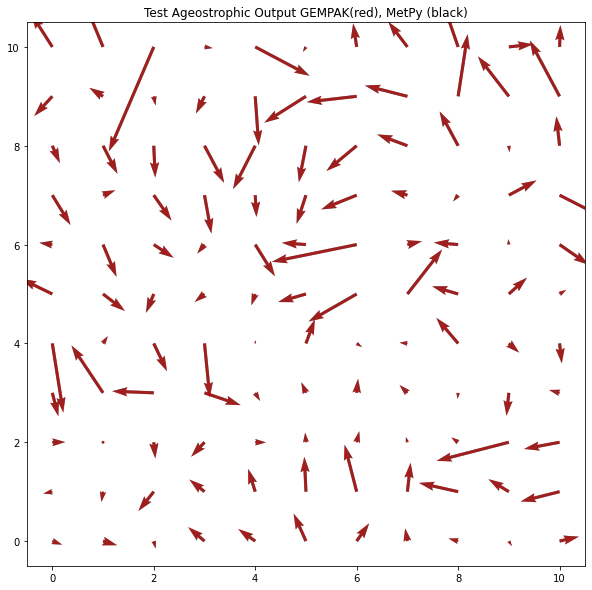

In [5]:
# Ageostrophic Wind

gempak_out_var_u, scale_u = read_gdlist('gempak_out_files/gempak_vector_function_u_comp_ageo.out')
gempak_out_var_v, scale_v = read_gdlist('gempak_out_files/gempak_vector_function_v_comp_ageo.out')

out_var_u = gempak_out_var_u * 10**scale_u
out_var_v = gempak_out_var_v * 10**scale_v

data_var = gfs_data.Geopotential_height_isobaric.sel(time=datetime(2018, 3, 8, 0), isobaric2=50000)
data_var_u = gfs_data['u-component_of_wind_isobaric'].sel(time=datetime(2018, 3, 8, 0), isobaric2=50000)
data_var_v = gfs_data['v-component_of_wind_isobaric'].sel(time=datetime(2018, 3, 8, 0), isobaric2=50000)
data_var_lat = gfs_data.lat

uageo, vageo = mpcalc.ageostrophic_wind(data_var, data_var_u, data_var_v,
                                        f=mpcalc.coriolis_parameter(data_var_lat.values[:, None] * units.degree))

# Subset to NH and not too tropical
NH_lat = int(360/2)-9
NH_lon = int(720/2)-9
print('Ageostrophic Wind')
print('U-component')
error_stats(uageo[3:NH_lat, 3:NH_lon], out_var_u[3:NH_lat, 3:NH_lon])
print()
print('V-component')
error_stats(vageo[3:NH_lat, 3:NH_lon], out_var_v[3:NH_lat, 3:NH_lon])

# Plot Check
fig = plt.figure(1, figsize=(10, 10))
ax = plt.subplot(111)

wind_slice = slice(60, 170, 10)
ax.quiver(uageo[wind_slice, wind_slice], vageo[wind_slice, wind_slice], alpha=0.75)
ax.quiver(out_var_u[wind_slice, wind_slice], out_var_v[wind_slice, wind_slice], color='red', alpha=0.5)
plt.title('Test Ageostrophic Output GEMPAK(red), MetPy (black)')
plt.show()

Geostrophic Wind
U-component
Is Xarray with Quantity? True

Mean Comparison
  Mean Values (MetPy): 7.77542998810543
  Mean Values (GEMPAK): 7.764759159663865

Max Comparison
  Max Values (MetPy): 84.67067511069094
  Max Values (GEMPAK): 84.65

Min Comparison
  Min Values (MetPy): -37.3576229263544
  Min Values (GEMPAK): -37.15

Difference Array
[0.02267051 0.01882808 0.0249857  ... 0.007376   0.00330812 0.01637128]

Various Statistical Analyses
  Average Absolute Difference: 0.025572157757209644
  RMS Error: 0.00014210388372342517
  Standard Deviation of Difference: 0.03297950105206106
  Max Diff: 0.17667501479359515
  Min Diff: -0.2076229263544036
  Correlation: 0.9999968342981934
  Relative Magnitude Difference: 0.0003020190605989485


V-component
Is Xarray with Quantity? True

Mean Comparison
  Mean Values (MetPy): -0.2793400065339562
  Mean Values (GEMPAK): -0.28790991596638654

Max Comparison
  Max Values (MetPy): 51.00082145643747
  Max Values (GEMPAK): 51.17

Min Comparison
  Mi

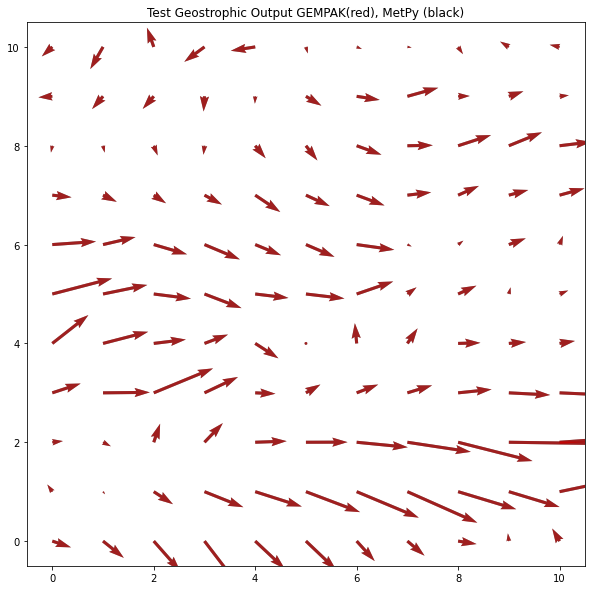

In [6]:
# Geostrophic Wind

gempak_out_var_u, scale_u = read_gdlist('gempak_out_files/gempak_vector_function_u_comp_geo.out')
gempak_out_var_v, scale_v = read_gdlist('gempak_out_files/gempak_vector_function_v_comp_geo.out')

out_var_u = gempak_out_var_u * 10**scale_u
out_var_v = gempak_out_var_v * 10**scale_v

data_var = gfs_data.Geopotential_height_isobaric.sel(time=datetime(2018, 3, 8, 0), isobaric2=50000)
data_var_lat = gfs_data.lat

ugeo, vgeo = mpcalc.geostrophic_wind(data_var, f=mpcalc.coriolis_parameter(data_var_lat.values[:, None] * units.degree))

# Subset to NH and not too tropical
NH_lat = int(360/2)-9
NH_lon = int(720/2)-9
print('Geostrophic Wind')
print('U-component')
error_stats(ugeo[1:NH_lat, 1:NH_lon], out_var_u[1:NH_lat, 1:NH_lon])
print()
print('V-component')
error_stats(vgeo[1:NH_lat, 1:NH_lon], out_var_v[1:NH_lat, 1:NH_lon])

# Plot Check
fig = plt.figure(1, figsize=(10, 10))
ax = plt.subplot(111)

wind_slice = slice(60, 170, 10)
ax.quiver(ugeo[wind_slice, wind_slice], vgeo[wind_slice, wind_slice], alpha=0.75)
ax.quiver(out_var_u[wind_slice, wind_slice], out_var_v[wind_slice, wind_slice], color='red', alpha=0.5)
plt.title('Test Geostrophic Output GEMPAK(red), MetPy (black)')
plt.show()

Gradient of Scalar
U-component
Is Quantity? False

Mean Comparison
  Mean Values (MetPy): -9.34326938201607e-08
  Mean Values (GEMPAK): -9.3555295194792e-08

Max Comparison
  Max Values (MetPy): 0.0015208041858026933
  Max Values (GEMPAK): 0.001527

Min Comparison
  Min Values (MetPy): -0.0012796095958644144
  Min Values (GEMPAK): -0.001281

Difference Array
[ 3.06176348e-05  3.06176348e-05  2.00784232e-05 ...  0.00000000e+00
 -1.05392116e-05 -1.05392116e-05]

Various Statistical Analyses
  Average Absolute Difference: 5.369001849466373e-07
  RMS Error: 5.84713275633997e-09
  Standard Deviation of Difference: 2.968604903227617e-06
  Max Diff: 7.177448128488623e-05
  Min Diff: -8.231369289637843e-05
  Correlation: 0.9995634222426033
  Relative Magnitude Difference: 0.000353037024726005


V-component
Is Quantity? False

Mean Comparison
  Mean Values (MetPy): 1.2209176703239525e-05
  Mean Values (GEMPAK): 1.2277469138197251e-05

Max Comparison
  Max Values (MetPy): 0.001369706620418236
  

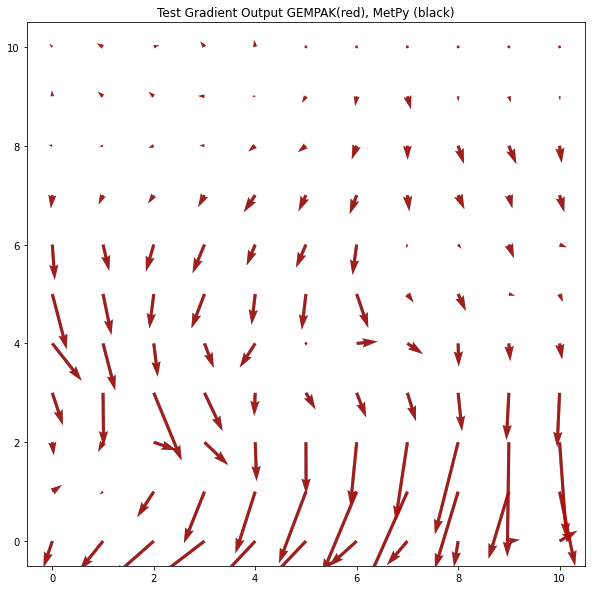

In [13]:
# Gradient of Scalar

gempak_out_var_u, scale_u = read_gdlist('gempak_out_files/gempak_vector_function_u_comp_grad.out')
gempak_out_var_v, scale_v = read_gdlist('gempak_out_files/gempak_vector_function_v_comp_grad.out')

out_var_u = gempak_out_var_u * 10**scale_u
out_var_v = gempak_out_var_v * 10**scale_v

data_var = gfs_data.Geopotential_height_isobaric.sel(time=datetime(2018, 3, 8, 0), isobaric2=50000)

gradient_vcomp, gradient_ucomp = mpcalc.gradient(data_var)

print('Gradient of Scalar')
print('U-component')
error_stats(gradient_ucomp[1:-1, 1:-1], out_var_u[1:-1, 1:-1])
print()
print('V-component')
error_stats(gradient_vcomp[1:-1, 1:-1], out_var_v[1:-1, 1:-1])

# Plot Check
fig = plt.figure(1, figsize=(10, 10))
ax = plt.subplot(111)

wind_slice = slice(60, 170, 10)
ax.quiver(gradient_ucomp[wind_slice, wind_slice], gradient_vcomp[wind_slice, wind_slice], alpha=0.75)
ax.quiver(out_var_u[wind_slice, wind_slice], out_var_v[wind_slice, wind_slice], color='red', alpha=0.5)
plt.title('Test Gradient Output GEMPAK(red), MetPy (black)')
plt.show()

/Users/kgoebber/miniconda3/envs/devel_cartopy18/lib/python3.8/site-packages/pint/quantity.py:930: RuntimeWarning: invalid value encountered in add
  magnitude = op(self._magnitude, other._magnitude)
/Users/kgoebber/miniconda3/envs/devel_cartopy18/lib/python3.8/site-packages/pint/quantity.py:930: RuntimeWarning: invalid value encountered in subtract
  magnitude = op(self._magnitude, other._magnitude)


Inertial-Advective Wind
U-component
Is Xarray with Quantity? True

Mean Comparison
  Mean Values (MetPy): 3.5662605795049755e-06
  Mean Values (GEMPAK): 2.771098620506698e-06

Max Comparison
  Max Values (MetPy): 0.0122335885334814
  Max Values (GEMPAK): 0.012432

Min Comparison
  Min Values (MetPy): -0.01550199115606976
  Min Values (GEMPAK): -0.015601

Difference Array
[-2.59583356e-04 -2.55358935e-04 -2.51450293e-04 ... -1.37737793e-06
  1.59552059e-06  1.72720333e-06]

Various Statistical Analyses
  Average Absolute Difference: 2.0370653975291773e-05
  RMS Error: 1.2610287909262656e-07
  Standard Deviation of Difference: 4.378952910741281e-05
  Max Diff: 0.0005351582340689717
  Min Diff: -0.0007163521729958069
  Correlation: 0.9974486405920509
  Relative Magnitude Difference: 0.0016651413376819492


V-component
Is Xarray with Quantity? True

Mean Comparison
  Mean Values (MetPy): -1.7599512244312385e-05
  Mean Values (GEMPAK): 2.3858693129062207e-05

Max Comparison
  Max Values (Me

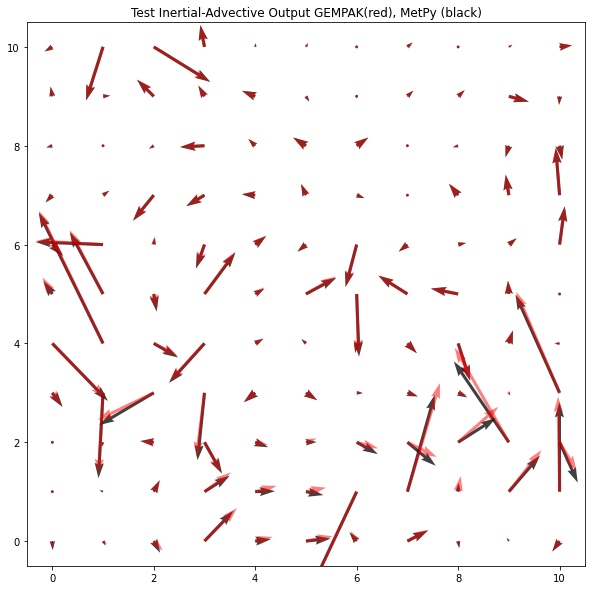

In [8]:
# Inertial Advective

gempak_out_var_u, scale_u = read_gdlist('gempak_out_files/gempak_vector_function_u_comp_inad.out')
gempak_out_var_v, scale_v = read_gdlist('gempak_out_files/gempak_vector_function_v_comp_inad.out')

out_var_u = gempak_out_var_u * 10**scale_u
out_var_v = gempak_out_var_v * 10**scale_v

data_var = gfs_data.Geopotential_height_isobaric.sel(time=datetime(2018, 3, 8, 0), isobaric2=50000)
data_var_u = gfs_data['u-component_of_wind_isobaric'].sel(time=datetime(2018, 3, 8, 0), isobaric2=50000)
data_var_v = gfs_data['v-component_of_wind_isobaric'].sel(time=datetime(2018, 3, 8, 0), isobaric2=50000)
data_var_lat = gfs_data.lat

ugeo, vgeo = mpcalc.geostrophic_wind(data_var, f=mpcalc.coriolis_parameter(data_var_lat.values[:, None] * units.degree))

v_inad, u_inad = mpcalc.inertial_advective_wind(data_var_u, data_var_v, ugeo, vgeo,
                                                latitude=data_var_lat.values[:, None] * units.degree)

u_inad *= mpcalc.coriolis_parameter(data_var_lat.values[:, None] * units.degree)
v_inad *= -mpcalc.coriolis_parameter(data_var_lat.values[:, None] * units.degree)

# Subset to NH and not too tropical
NH_lat = int(360/2)-10
NH_lon = -1
print('Inertial-Advective Wind')
print('U-component')
error_stats(u_inad[2:NH_lat, 1:NH_lon], out_var_u[2:NH_lat, 1:NH_lon])
print()
print('V-component')
error_stats(v_inad[2:NH_lat, 1:NH_lon], out_var_v[2:NH_lat, 1:NH_lon])

# Plot Check
fig = plt.figure(1, figsize=(10, 10))
ax = plt.subplot(111)

wind_slice = slice(60, 170, 10)
ax.quiver(u_inad[wind_slice, wind_slice], v_inad[wind_slice, wind_slice], alpha=0.75)
ax.quiver(out_var_u[wind_slice, wind_slice], out_var_v[wind_slice, wind_slice], color='red', alpha=0.5)
plt.title('Test Inertial-Advective Output GEMPAK(red), MetPy (black)')
plt.show()

Q-Vectors
U-component
Is Metpy Unit Array Quantity? True

Mean Comparison
  Mean Values (MetPy): 1.7034196463130745e-11
  Mean Values (GEMPAK): 4.025446798437689e-13

Max Comparison
  Max Values (MetPy): 1.6479949641966813e-07
  Max Values (GEMPAK): 1.61891e-07

Min Comparison
  Min Values (MetPy): -4.838250540527295e-07
  Min Values (GEMPAK): -4.93598e-07

Difference Array
[ 6.72299835e-11  6.66454687e-11  6.66454687e-11 ...  1.12712590e-09
  1.13205041e-09 -2.76231982e-11]

Various Statistical Analyses
  Average Absolute Difference: 4.0653962125396906e-11
  RMS Error: 3.3710958630173157e-13
  Standard Deviation of Difference: 1.689036625506184e-10
  Max Diff: 9.772945947270512e-09
  Min Diff: -2.5463734806983807e-09
  Correlation: 0.9965229209068263
  Relative Magnitude Difference: 0.0002466874171864583


V-component
Is Metpy Unit Array Quantity? True

Mean Comparison
  Mean Values (MetPy): 8.77480130686023e-12
  Mean Values (GEMPAK): 8.829029076419302e-12

Max Comparison
  Max Value

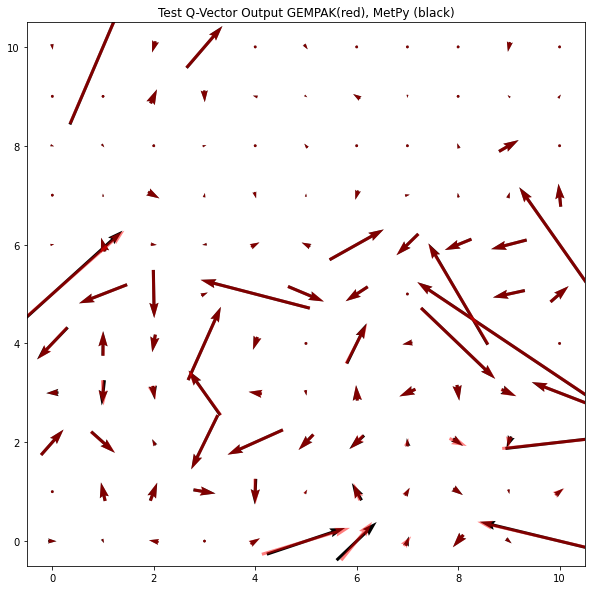

In [9]:
# QVectors

gempak_out_var_u, scale_u = read_gdlist('gempak_out_files/gempak_vector_function_u_comp_qvec.out')
gempak_out_var_v, scale_v = read_gdlist('gempak_out_files/gempak_vector_function_v_comp_qvec.out')

out_var_u = gempak_out_var_u * 10**scale_u
out_var_v = gempak_out_var_v * 10**scale_v

data_var = gfs_data.Temperature_isobaric.sel(time=datetime(2018, 3, 8, 0), isobaric2=85000)
data_var_u = gfs_data['u-component_of_wind_isobaric'].sel(time=datetime(2018, 3, 8, 0), isobaric2=85000)
data_var_v = gfs_data['v-component_of_wind_isobaric'].sel(time=datetime(2018, 3, 8, 0), isobaric2=85000)
data_var_lat = gfs_data.lat

u_qvect, v_qvect = mpcalc.q_vector(data_var_u, data_var_v,
                                   mpcalc.potential_temperature(850 * units.hPa, data_var), 850 * units.hPa)

u_qvect = (u_qvect.metpy.unit_array / mpconst.Rd * 850 * units.hPa).to_base_units()
v_qvect = (v_qvect.metpy.unit_array / mpconst.Rd * 850 * units.hPa).to_base_units()

wind_slice = slice(3, -3, None)
print('Q-Vectors')
print('U-component')
error_stats(u_qvect[wind_slice, wind_slice], out_var_u[wind_slice, wind_slice])
print()
print('V-component')
error_stats(v_qvect[wind_slice, wind_slice], out_var_v[wind_slice, wind_slice])

# Plot Check
fig = plt.figure(3, figsize=(10, 10))
ax = plt.subplot(111)

wind_slice = slice(60, 170, 10)
ax.quiver(u_qvect[wind_slice, wind_slice], v_qvect[wind_slice, wind_slice], pivot='mid', scale=1e-8)
ax.quiver(out_var_u[wind_slice, wind_slice], out_var_v[wind_slice, wind_slice], color='red', pivot='mid', scale=1e-8, alpha=0.5)
plt.title('Test Q-Vector Output GEMPAK(red), MetPy (black)')
plt.show()

Knot Unit Conversion
U-component
Is Quantity? False

Mean Comparison
  Mean Values (MetPy): 14.211416244506836
  Mean Values (GEMPAK): 14.211418629423601

Max Comparison
  Max Values (MetPy): 112.86798095703125
  Max Values (GEMPAK): 112.87

Min Comparison
  Min Values (MetPy): -55.799285888671875
  Min Values (GEMPAK): -55.8

Difference Array
[-0.00321407  0.00275986 -0.00068874 ...  0.00313557  0.0019854
  0.00083523]

Various Statistical Analyses
  Average Absolute Difference: 0.0025018191731714916
  RMS Error: 5.7360418133506434e-06
  Standard Deviation of Difference: 0.002887855422877916
  Max Diff: 0.004988250732424149
  Min Diff: -0.00499160766601392
  Correlation: 0.999999992117533
  Relative Magnitude Difference: 2.216588931562382e-05


V-component
Is Quantity? False

Mean Comparison
  Mean Values (MetPy): 0.00218681781552732
  Mean Values (GEMPAK): 0.002181125971515347

Max Comparison
  Max Values (MetPy): 81.7940673828125
  Max Values (GEMPAK): 81.79

Min Comparison
  Min Va

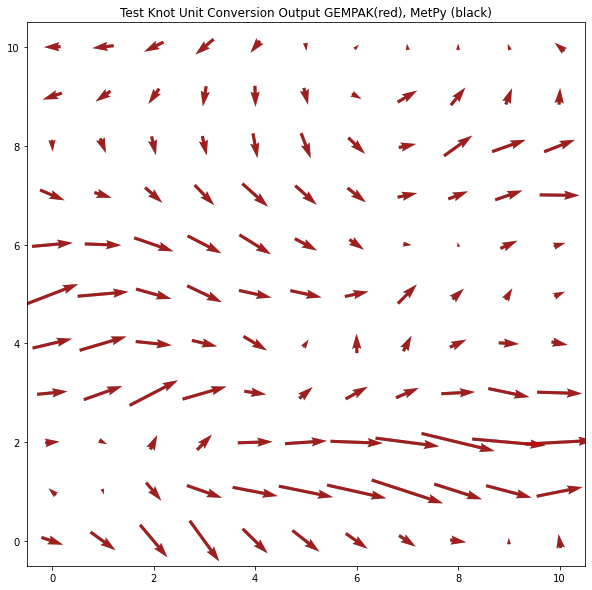

In [10]:
# KNTV

gempak_out_var_u, scale_u = read_gdlist('gempak_out_files/gempak_vector_function_u_comp_kntv.out')
gempak_out_var_v, scale_v = read_gdlist('gempak_out_files/gempak_vector_function_v_comp_kntv.out')

out_var_u = gempak_out_var_u * 10**scale_u
out_var_v = gempak_out_var_v * 10**scale_v

data_var_u = gfs_data['u-component_of_wind_isobaric'].sel(time=datetime(2018, 3, 8, 0), isobaric2=50000)
data_var_v = gfs_data['v-component_of_wind_isobaric'].sel(time=datetime(2018, 3, 8, 0), isobaric2=50000)

data_var_u_kt = data_var_u.metpy.convert_units('knot')
data_var_v_kt = data_var_v.metpy.convert_units('knot')

data_var_u_kt = data_var_u * 1.9425
data_var_v_kt = data_var_v * 1.9425

wind_slice = slice(3, -3, None)
print('Knot Unit Conversion')
print('U-component')
error_stats(data_var_u_kt[wind_slice, wind_slice], out_var_u[wind_slice, wind_slice])
print()
print('V-component')
error_stats(data_var_v_kt[wind_slice, wind_slice], out_var_v[wind_slice, wind_slice])

# Plot Check
fig = plt.figure(3, figsize=(10, 10))
ax = plt.subplot(111)

wind_slice = slice(60, 170, 10)
ax.quiver(data_var_u_kt[wind_slice, wind_slice], data_var_v_kt[wind_slice, wind_slice], pivot='mid', alpha=0.75)
ax.quiver(out_var_u[wind_slice, wind_slice], out_var_v[wind_slice, wind_slice], color='red', pivot='mid', alpha=0.5)
plt.title('Test Knot Unit Conversion Output GEMPAK(red), MetPy (black)')
plt.show()

5-point Smoother
U-component
Is Xarray with Quantity? True

Mean Comparison
  Mean Values (MetPy): 7.316443920135498
  Mean Values (GEMPAK): 7.316421783643036

Max Comparison
  Max Values (MetPy): 57.63324737548828
  Max Values (GEMPAK): 57.633199999999995

Min Comparison
  Min Values (MetPy): -26.084253311157227
  Min Values (GEMPAK): -26.0843

Difference Array
[-2.79617310e-06 -3.27301025e-06 -2.79617310e-06 ...  4.69558716e-05
 -3.27301025e-06  4.74517822e-05]

Various Statistical Analyses
  Average Absolute Difference: 2.5049838773465214e-05
  RMS Error: 6.63240697317698e-08
  Standard Deviation of Difference: 2.503560832740197e-05
  Max Diff: 5.286865234666038e-05
  Min Diff: -5.811767578478566e-05
  Correlation: 0.9999999999977528
  Relative Magnitude Difference: 4.3464215386410866e-07


V-component
Is Xarray with Quantity? True

Mean Comparison
  Mean Values (MetPy): 0.0011705534998327494
  Mean Values (GEMPAK): 0.0011662468931234538

Max Comparison
  Max Values (MetPy): 41.6913

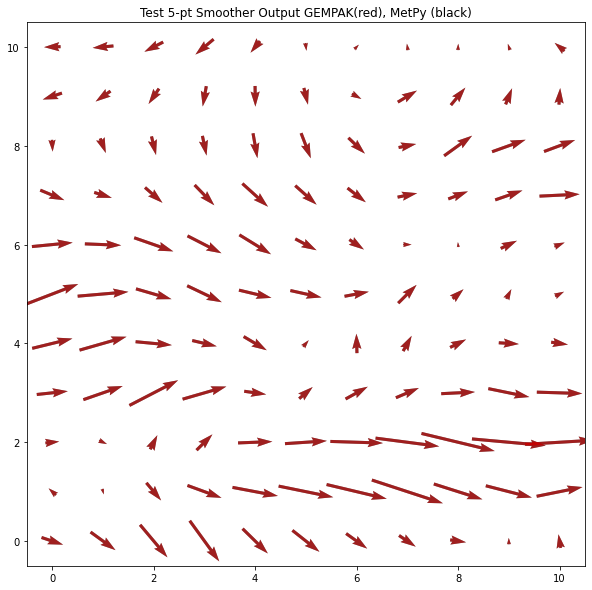

In [11]:
# SM5V

gempak_out_var_u, scale_u = read_gdlist('gempak_out_files/gempak_vector_function_u_comp_sm5v.out')
gempak_out_var_v, scale_v = read_gdlist('gempak_out_files/gempak_vector_function_v_comp_sm5v.out')

out_var_u = gempak_out_var_u * 10**scale_u
out_var_v = gempak_out_var_v * 10**scale_v

data_var_u = gfs_data['u-component_of_wind_isobaric'].sel(time=datetime(2018, 3, 8, 0), isobaric2=50000)
data_var_v = gfs_data['v-component_of_wind_isobaric'].sel(time=datetime(2018, 3, 8, 0), isobaric2=50000)

data_var_u_sm5v = mpcalc.smooth_n_point(data_var_u, 5, 1)
data_var_v_sm5v = mpcalc.smooth_n_point(data_var_v, 5, 1)


wind_slice = slice(3, -3, None)
print('5-point Smoother')
print('U-component')
error_stats(data_var_u_sm5v[wind_slice, wind_slice], out_var_u[wind_slice, wind_slice])
print()
print('V-component')
error_stats(data_var_v_sm5v[wind_slice, wind_slice], out_var_v[wind_slice, wind_slice])

# Plot Check
fig = plt.figure(3, figsize=(10, 10))
ax = plt.subplot(111)

wind_slice = slice(60, 170, 10)
ax.quiver(data_var_u_sm5v[wind_slice, wind_slice], data_var_v_sm5v[wind_slice, wind_slice], pivot='mid', alpha=0.75)
ax.quiver(out_var_u[wind_slice, wind_slice], out_var_v[wind_slice, wind_slice], color='red', pivot='mid', alpha=0.5)
plt.title('Test 5-pt Smoother Output GEMPAK(red), MetPy (black)')
plt.show()